In [1]:
import sys
sys.path.append("../library/")
import numpy as np
import matplotlib.pyplot as plt
from defaultPlot import *
from stringFormat import *
from read_data import readKM, readReal, readFig4

In [2]:
real_confirmed = readReal()
real_time = np.arange(0, len(real_confirmed), 1)

In [3]:
fig4_t, fig4_s, fig4_qs, fig4_e, fig4_qe, fig4_a, fig4_qa, fig4_i, fig4_qi, fig4_r, fig4_qr, fig4_cr = readFig4()
fig4_t = fig4_t[:20900]

fig4_qa = fig4_qa[:20900]
fig4_qi = fig4_qi[:20900]
fig4_cr = fig4_cr[:20900]


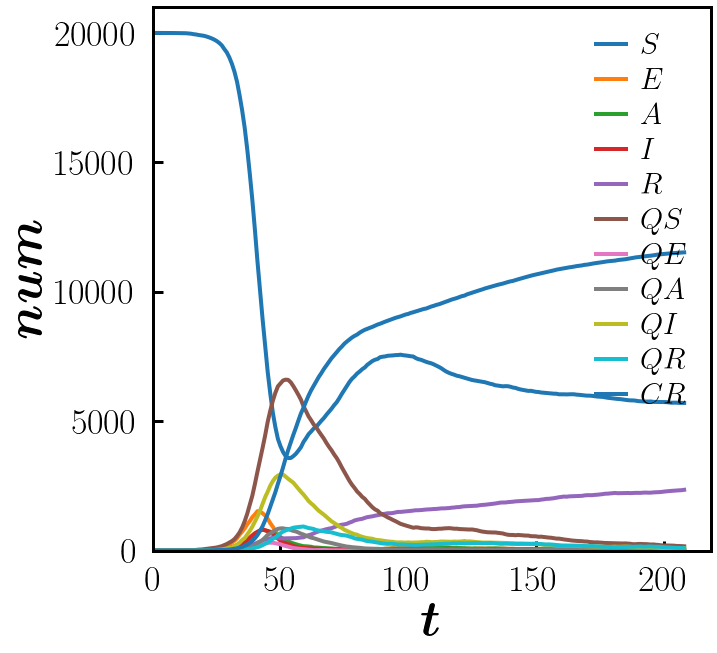

In [7]:
fig, ax = plt.subplots()

ax.plot(time, numS, label=latex_string("S"))
ax.plot(time, numE, label=latex_string("E"))
ax.plot(time, numA, label=latex_string("A"))
ax.plot(time, numI, label=latex_string("I"))
ax.plot(time, numR, label=latex_string("R"))
ax.plot(time, numQS, label=latex_string("QS"))
ax.plot(time, numQE, label=latex_string("QE"))
ax.plot(time, numQA, label=latex_string("QA"))
ax.plot(time, numQI, label=latex_string("QI"))
ax.plot(time, numQR, label=latex_string("QR"))
ax.plot(time, numCR, label=latex_string("CR"))

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("num"))
ax.legend(loc="upper right", fontsize=30)
plt.show()

In [6]:
network_type = "ER"
network_size = 20000
mean_degree = 10

S_E = 0.11
E_AI = 0.39
pA = 0.36
I_QI = 0.33
A_R = 0.11
QI_CR = 0.08
X_QX = 0.09
tau = 14.00
E_A = pA * E_AI
E_I = (1-pA) * E_AI

randomEngineSeed = 0

numS, numE, numA, numI, numR, numQS, numQE, numQA, numQI, numQR, numCR = readKM(network_type, network_size, mean_degree, S_E, E_AI, pA, I_QI, A_R, QI_CR, X_QX, tau, randomEngineSeed)
time = np.arange(0, len(numS), 1)
numConfirmed = numQA + numQI + numCR


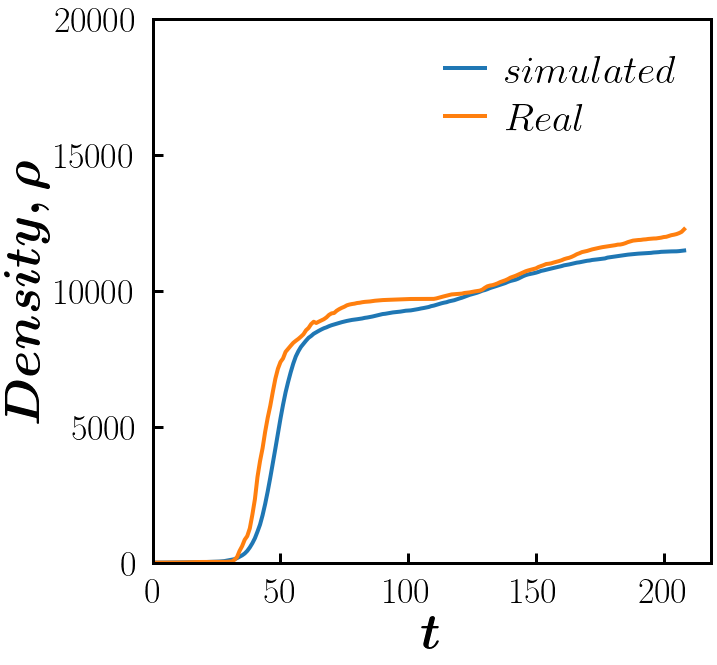

In [8]:
fig, ax = plt.subplots()

ax.plot(time, numConfirmed, label=latex_string("simulated"))
ax.plot(real_time, real_confirmed, label=latex_string("Real"))
# ax.plot(fig4_t, (fig4_qa + fig4_qi + fig4_cr), label=latex_string("Fig4"))


ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=20000)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("Density, \\rho"))
ax.legend(loc="upper right")
fig.show()


In [9]:
real_confirmed - numConfirmed

array([   0,    1,    1,   -1,   -1,   -1,   -3,   -3,   -2,   -4,   -4,
         -2,    2,    1,    2,    1,    1,    6,    7,    4,    4,    4,
          1,    1,   -3,   -8,  -12,  -19,  -27,  -43,  -48,  -60,  -23,
         37,  215,  339,  506,  545,  701, 1051, 1438, 2009, 2336, 2466,
       2657, 2711, 2643, 2632, 2571, 2375, 2083, 1707, 1490, 1218,  975,
        765,  576,  454,  378,  348,  382,  363,  437,  442,  340,  337,
        331,  333,  366,  415,  436,  421,  473,  504,  528,  544,  575,
        585,  585,  588,  597,  592,  597,  588,  581,  572,  569,  558,
        544,  528,  514,  506,  495,  483,  471,  465,  458,  455,  439,
        426,  423,  419,  403,  389,  369,  351,  335,  314,  297,  266,
        248,  236,  232,  235,  234,  238,  232,  232,  222,  196,  170,
        151,  139,  114,   91,   85,   74,   59,   41,   39,   83,  105,
         92,   79,   77,   82,  101,   99,  102,  102,  122,  132,  142,
        149,  143,  137,  143,  145,  150,  150,  1

In [10]:
energy = 0
for x,y in zip(numCR + numQA + numQI, real_confirmed):
    energy += np.power(x-y, 2.0)
# print(energy)
print(np.sqrt(energy/len(numCR)))

# numCR+numQA+numQI

680.5125988026869


In [13]:
real_confirmed

array([    0,     1,     1,     1,     1,     2,     2,     2,     4,
           4,     4,     7,    11,    12,    15,    15,    16,    21,
          24,    24,    24,    27,    27,    28,    28,    28,    28,
          28,    29,    30,    39,    46,   104,   204,   433,   608,
         843,   977,  1261,  1766,  2337,  3150,  3736,  4212,  4812,
        5328,  5766,  6284,  6767,  7134,  7382,  7513,  7755,  7869,
        7979,  8086,  8162,  8232,  8314,  8402,  8549,  8635,  8776,
        8863,  8817,  8866,  8910,  8957,  9023,  9115,  9171,  9185,
        9268,  9327,  9375,  9415,  9468,  9496,  9515,  9529,  9552,
        9562,  9581,  9594,  9600,  9609,  9624,  9636,  9646,  9652,
        9660,  9662,  9668,  9672,  9677,  9681,  9685,  9691,  9691,
        9694,  9696,  9700,  9700,  9701,  9699,  9702,  9702,  9702,
        9702,  9703,  9704,  9721,  9747,  9776,  9798,  9820,  9846,
        9868,  9877,  9883,  9888,  9897,  9921,  9931,  9942,  9961,
        9978,  9991,